In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -m -p scipy,sklearn,numpy

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
CPython 3.5.2
IPython 5.1.0

scipy 0.18.1
sklearn 0.18
numpy 1.11.1

compiler   : GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)
system     : Darwin
release    : 16.0.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [3]:
import sys
sys.path.append('../mllearn')

In [4]:
from neuron import SingleNeuron

In [5]:
n1 = SingleNeuron()

In [6]:
n1.set_params(5, 1)
n1.forpass(3)

16

In [7]:
n1.set_params(6, 1)
n1.forpass(3)

19

In [8]:
n1.set_params(5, 1)
n1.forpass(4)

21

In [9]:
n1.set_params(5, 2)
n1.forpass(3)

17

In [10]:
n1.set_params(5, 0)
n1.forpass(3)

15

In [11]:
n1.set_params(5, 1)
for i in range(30000):
    y_hat = n1.forpass(diabetes.data[:, 3])
    error = diabetes.target - y_hat
    n1.backprop(error)
    n1.update_grad()
print('Final W', n1._w)
print('Final b', n1._b)

Final W 713.941686629
Final b 152.133484163


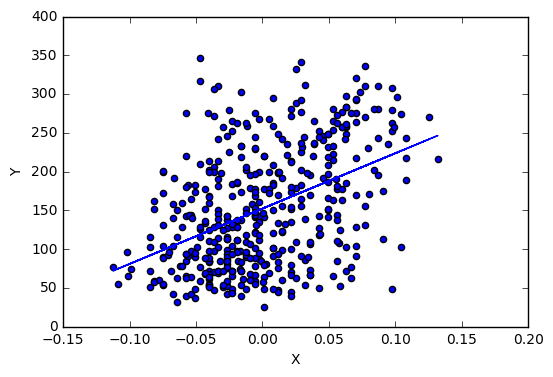

In [12]:
plt.scatter(diabetes.data[:, 3], diabetes.target)
plt.plot(diabetes.data[:, 3], diabetes.data[:, 3]*n1._w + n1._b)
plt.xlabel('X')
plt.ylabel('Y')

In [13]:
from sklearn import linear_model

sgd_regr = linear_model.SGDRegressor(n_iter=30000, penalty='none')
sgd_regr.fit(np.vstack(diabetes.data[:, 3]), diabetes.target)
print('Coefficients: ', sgd_regr.coef_, sgd_regr.intercept_)

Coefficients:  [ 713.80426786] [ 152.13125447]


In [14]:
print(diabetes.data[:, 3][:10])

[ 0.02187235 -0.02632783 -0.00567061 -0.03665645  0.02187235 -0.01944209
 -0.01599922  0.06662967 -0.04009932 -0.03321358]


In [15]:
print(np.vstack(diabetes.data[:, 3])[:10])

[[ 0.02187235]
 [-0.02632783]
 [-0.00567061]
 [-0.03665645]
 [ 0.02187235]
 [-0.01944209]
 [-0.01599922]
 [ 0.06662967]
 [-0.04009932]
 [-0.03321358]]


In [16]:
sgd_regr = linear_model.LinearRegression()
sgd_regr.fit(np.vstack(diabetes.data[:, 3]), diabetes.target)
print('Coefficients: ', sgd_regr.coef_, sgd_regr.intercept_)

Coefficients:  [ 714.7416437] 152.133484163
